In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
df = pd.read_csv("student_data.csv")

In [48]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,9


In [49]:
df.shape

(395, 34)

In [50]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.660759
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.719390
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       395 non-null    object
 1   sex          395 non-null    object
 2   age          395 non-null    int64 
 3   address      395 non-null    object
 4   famsize      395 non-null    object
 5   Pstatus      395 non-null    object
 6   Medu         395 non-null    int64 
 7   Fedu         395 non-null    int64 
 8   Mjob         395 non-null    object
 9   Fjob         395 non-null    object
 10  reason       395 non-null    object
 11  guardian     395 non-null    object
 12  traveltime   395 non-null    int64 
 13  studytime    395 non-null    int64 
 14  failures     395 non-null    int64 
 15  schoolsup    395 non-null    object
 16  famsup       395 non-null    object
 17  paid         395 non-null    object
 18  activities   395 non-null    object
 19  nursery      395 non-null    

In [52]:
df.isnull().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
Final_grade    0
dtype: int64

In [53]:
df.drop(['Pstatus','traveltime','famsup','nursery','higher','famrel','health'],axis=1,inplace = True)

In [54]:
df.shape

(395, 27)

Explore The Data

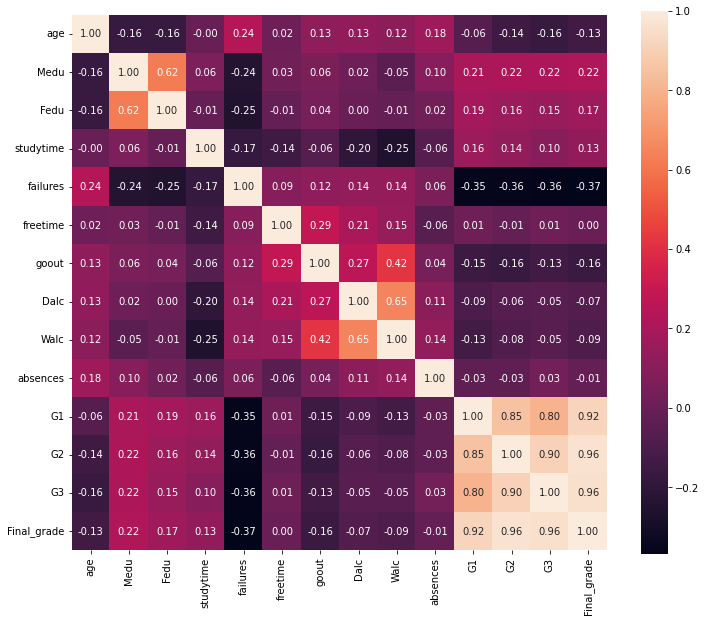

In [55]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12,10))
hm_school_info = sns.heatmap(corr,cbar=True, annot = True, square= True, fmt = ".2f",
                              annot_kws={"size":10,},yticklabels = corr.index,xticklabels=corr.index)
plt.show()

What school has the highest grades?

In [56]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

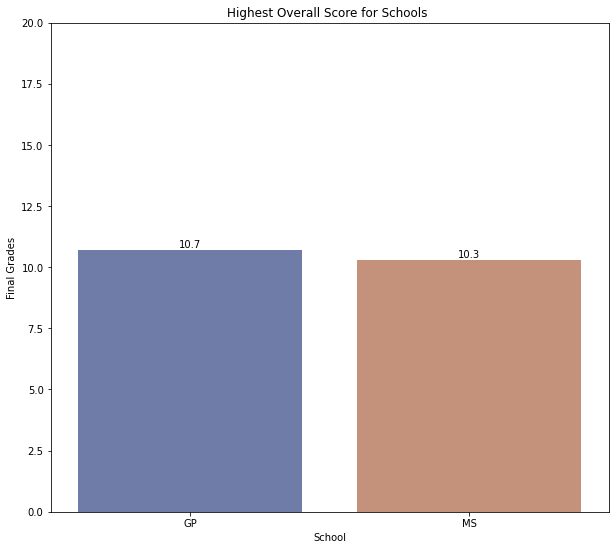

In [63]:
plt.figure(figsize = (10,9))
grade = sns.barplot(data=df,x='school',y='Final_grade',
            ci=None,palette='dark',alpha=.6)
show_values(grade)
plt.title('Highest Overall Score for Schools ')
plt.ylim(0,20)
plt.xlabel('School')
plt.ylabel('Final Grades')
plt.show()

Does Family Size affect their grade

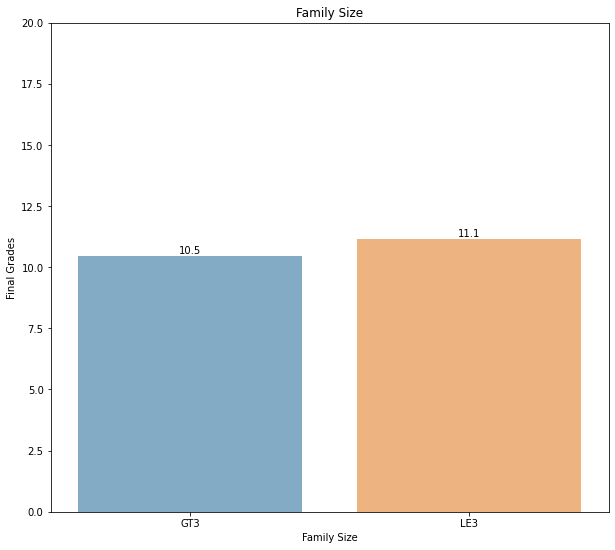

In [64]:
plt.figure(figsize = (10,9))
fam_size= sns.barplot(data=df,x='famsize',y='Final_grade',
            ci=None,alpha=.6)
show_values(fam_size)
plt.title('Family Size')
plt.ylim(0,20)
plt.xlabel('Family Size')
plt.ylabel('Final Grades')
plt.show()

Does their primary guardian affect their grade?

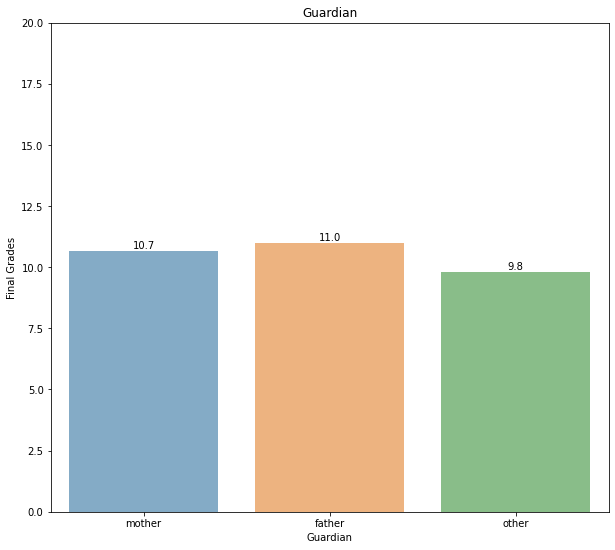

In [62]:
plt.figure(figsize = (10,9))
guardian= sns.barplot(data=df,x='guardian',y='Final_grade',
            ci=None,alpha=.6)
show_values(guardian)
plt.title('Guardian')
plt.ylim(0,20)
plt.xlabel('Guardian')
plt.ylabel('Final Grades')
plt.show()